## Predicting House Prices in King County: Evaluating the Impact of Home Features and Renovations using  Comprehensive Analysis of multiple linear regression.

### INTRODUCTION
The real estate market in King County is dynamic and competitive, with various factors influencing property values. Homeowners and real estate agencies are particularly interested in understanding how different features of a house, as well as renovations, can impact its market value. Accurate and data-driven insights into these factors can significantly enhance decision-making processes for buying, selling, and renovating homes.

### KEY OBJECTIVES
1. Create a Home Price Predictive Model:

Build and improve a regression model to precisely forecast King County real estate values depending on a range of property characteristics and remodeling factors.
Make that the model is reliable, strong, and has high predicted accuracy.

2. List the Main Factors Affecting Home Prices:

Determine which characteristics—such as location, number of bedrooms, and square footage—have the most effects on home pricing by analyzing the dataset.
Analyze the impact of particular improvements on home values, such as kitchen remodels and bathroom additions.

3. Give Homeowners Useful Information:

Utilize the model's output to provide homeowners with useful guidance on how to increase the market value of their property through well-chosen upgrades.
Determine which upgrades are most cost-effective and provide the best return on investment.

4. Facilitate Decision-Making in Real Estate Agencies:

Provide the real estate company with data-driven insights so that it may provide clients with more informed purchasing and selling advice.
Boost the agency's capacity to advise customers on the types of home upgrades that will most likely raise their property's worth.

### OUTLINE
1. Data analysis and cleaning: Outliers and missing values were handled as the King County House Sales dataset was loaded and cleaned.
2. Exploratory Data Analysis (EDA): Investigated the connections between attributes and prices and produced a visual representation of the distribution of home prices.
3. Determined the essential characteristics most closely correlated with home values.
4. Model Development: Four more sophisticated linear regression models were constructed and assessed.
5. Model Evaluation: R-squared (R²) and Mean Absolute Error (MAE) were used to evaluate the performance of the model.
6. Suggestions: gave homeowners and real estate agents practical advice on how to increase house values by emphasizing living space optimization and quality enhancements.


### DATA UNDERSTANDING

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Get the shape of dataframe
df.shape

(21597, 21)

There are 21597 rows in the data frame

There are 21 columns in the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We decided to use different EDA approaches to yield different models and results. This included dropping rows with null values, dropping various columns and filling null values with the mean values.

### Approach 1

### DATA PREPARATION

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Drop rows with null values.

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [8]:
df["sqft_basement"].head()

1     400.0
3     910.0
4       0.0
5    1530.0
6         ?
Name: sqft_basement, dtype: object

In [9]:
len(df.query("sqft_basement=='?'"))

333

In [10]:
data = df.query("sqft_basement!='?'")
data = data.astype({"sqft_basement": float})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15429 non-null  int64  
 1   date           15429 non-null  object 
 2   price          15429 non-null  float64
 3   bedrooms       15429 non-null  int64  
 4   bathrooms      15429 non-null  float64
 5   sqft_living    15429 non-null  int64  
 6   sqft_lot       15429 non-null  int64  
 7   floors         15429 non-null  float64
 8   waterfront     15429 non-null  float64
 9   view           15429 non-null  float64
 10  condition      15429 non-null  int64  
 11  grade          15429 non-null  int64  
 12  sqft_above     15429 non-null  int64  
 13  sqft_basement  15429 non-null  float64
 14  yr_built       15429 non-null  int64  
 15  yr_renovated   15429 non-null  float64
 16  zipcode        15429 non-null  int64  
 17  lat            15429 non-null  float64
 18  long  

Plot scatter plots to determine numerical and categorical columns.

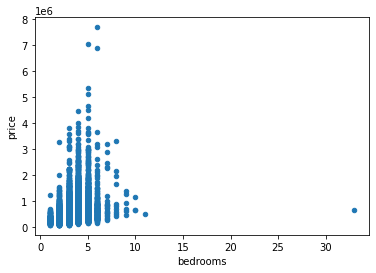

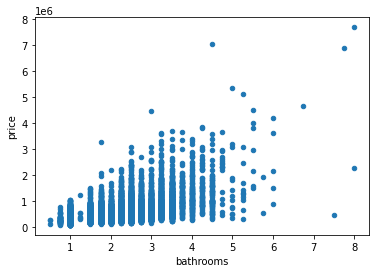

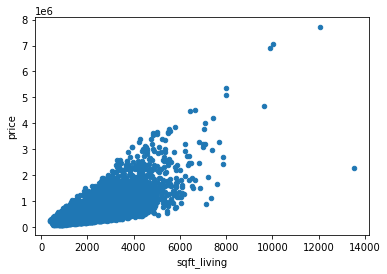

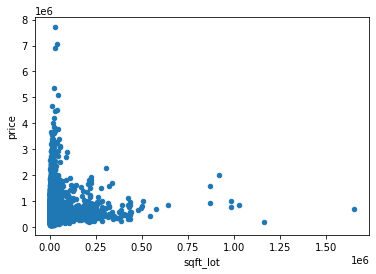

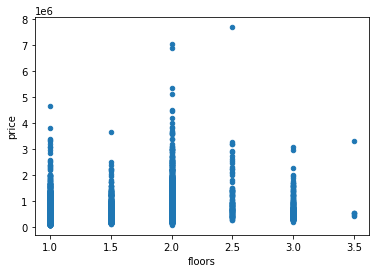

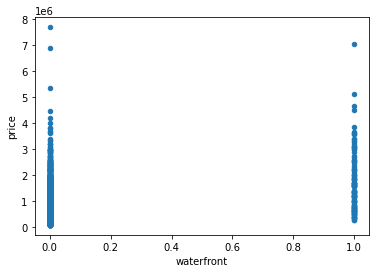

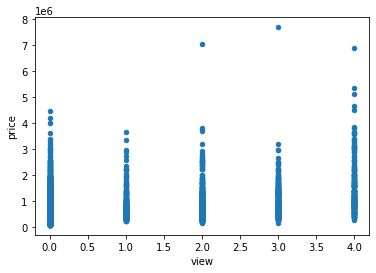

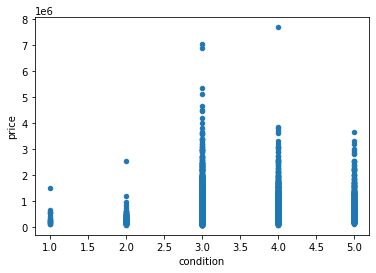

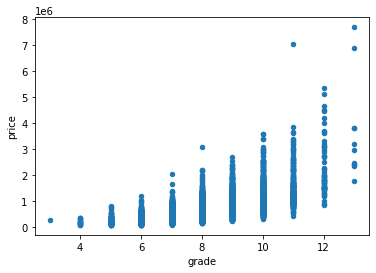

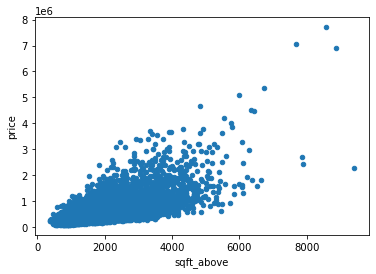

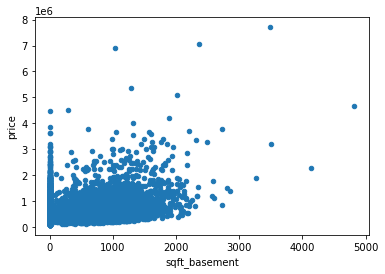

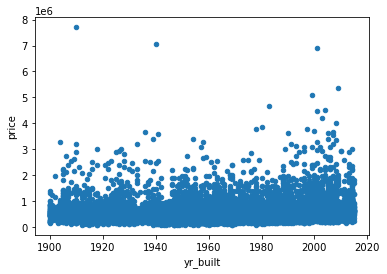

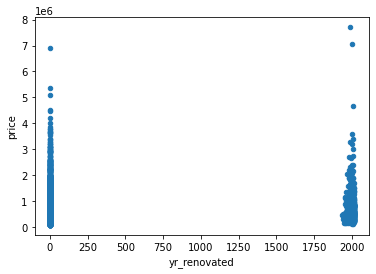

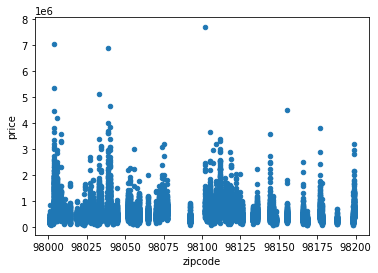

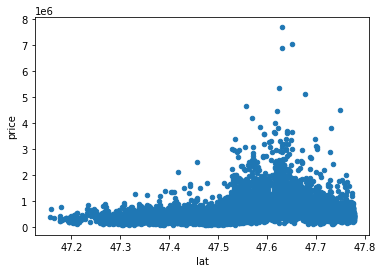

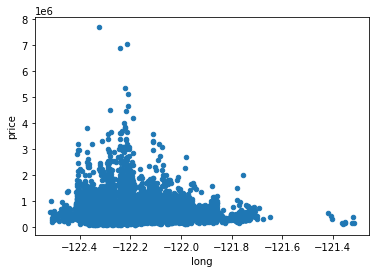

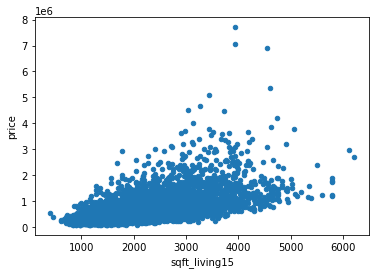

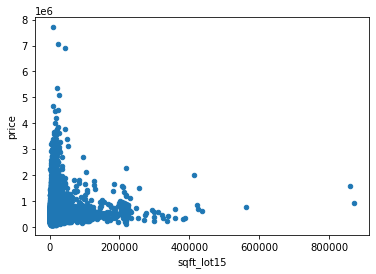

In [11]:
for col in data.columns[3:]:
    data.plot.scatter(x=col, y="price")    

In [12]:
x_continuous = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "lat", "long", "sqft_living15", "sqft_lot15"]
x_categorical = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "yr_built", "yr_renovated", "zipcode"]

Remove strong correlations in numeric variables.

In [13]:
data_cont = data.loc[:, x_continuous]
data_cont.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
1,2570,7242,2170,400.0,47.7210,-122.319,1690,7639
3,1960,5000,1050,910.0,47.5208,-122.393,1360,5000
4,1680,8080,1680,0.0,47.6168,-122.045,1800,7503
5,5420,101930,3890,1530.0,47.6561,-122.005,4760,101930
8,1780,7470,1050,730.0,47.5123,-122.337,1780,8113


In [14]:
abs(data_cont.corr()) > 0.75

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
sqft_living,True,False,True,False,False,False,True,False
sqft_lot,False,True,False,False,False,False,False,False
sqft_above,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False
lat,False,False,False,False,True,False,False,False
long,False,False,False,False,False,True,False,False
sqft_living15,True,False,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,True


In [15]:
df = data_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876449
"(sqft_living15, sqft_living)",0.756714


We choose to drop the ```sqft_living``` column. We also drop ```lat``` and ```long``` whose negative values would cause an error when transforming variables.

In [16]:
x_continuous = ["price", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]
x_categorical = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "yr_built", "yr_renovated", "zipcode"]

Log transform and scale continous features.

In [17]:
data_cont = data[x_continuous]
log_names = [f'{column}_log' for column in data_cont.columns]
with np.errstate(divide='ignore'):
    data_log = np.log(data_cont)
data_log.columns = log_names
data_log_norm = data_log.apply(
    lambda feature: (feature - feature.mean()) / feature.std())

Transforming categorical variables.

In [18]:
data_ohe = pd.get_dummies(data[x_categorical].astype(str), prefix=x_categorical, drop_first=True)

Combine categorical and continuous features

In [19]:
data_preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
data_preprocessed.head()

,price_log,sqft_lot_log,sqft_above_log,sqft_basement_log,sqft_living15_log,sqft_lot15_log,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1,0.277341,-0.120208,0.665971,NaN,-0.334610,-0.031844,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.497083,-0.529324,-1.034181,NaN,-0.999040,-0.553124,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.175844,0.000712,0.066572,NaN,-0.141749,-0.053938,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1.847631,2.800118,2.032961,NaN,2.832478,3.154931,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1.340509,-0.085976,-1.034181,NaN,-0.175922,0.042199,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Modeling & Regression Results

Running a linear model with ```price``` as the target variable

In [20]:
X = data_preprocessed.drop(["price_log", "sqft_basement_log"], axis=1)
y = data_preprocessed["price_log"]

In [21]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model1 = sm.OLS(y,X_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     373.9
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:24:02   Log-Likelihood:                -5076.7
No. Observations:               15429   AIC:                         1.079e+04
Df Residuals:                   15111   BIC:                         1.322e+04
Df Model:                         317                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5670      0.223     -7.028      0.000      -2.004      -1.130
sqft_lot_log            0.1473      0.007     19.945      0.000       0.133       0.162
sqft_above_log          0.2359      0.006     36.920      0.000       0.223       0.248
sqft_living15_log       0.1155      0.005     23.285      0.000       0.106       0.125
sqft_lot15_log         -0.0209      0.007     -2.859      0.004      -0.035      -0.007
bedrooms_10            -0.2027      0.204     -0.994      0.320      -0.602       0.197
bedrooms_11             0.2593      0.358      0.723      0.469      -0.443       0.962
bedrooms_2              0.0669      0.032      2.072      0.038       0.004       0.130
bedrooms_3              0.0746      0.032      2.295      0.022       0.011       0.138
bedrooms_33             0.3167      0.343      0.924      0.356      -0.355       0.989
bedrooms_4              0.1200      0.033      3.618      0.000       0.055       0.185
bedrooms_5              0.1080      0.035      3.111      0.002       0.040       0.176
bedrooms_6              0.1153      0.042      2.724      0.006       0.032       0.198
bedrooms_7             -0.0764      0.083     -0.918      0.359      -0.240       0.087
bedrooms_8              0.2141      0.116      1.842      0.066      -0.014       0.442
bedrooms_9              0.0176      0.162      0.109      0.913      -0.299       0.334
bathrooms_0.75          0.5095      0.204      2.497      0.013       0.110       0.909
bathrooms_1.0           0.4234      0.198      2.137      0.033       0.035       0.812
bathrooms_1.25          0.4592      0.242      1.895      0.058      -0.016       0.934
bathrooms_1.5           0.4971      0.199      2.504      0.012       0.108       0.886
bathrooms_1.75          0.5656      0.198      2.850      0.004       0.177       0.955
bathrooms_2.0           0.5488      0.199      2.765      0.006       0.160       0.938
bathrooms_2.25          0.6515      0.199      3.280      0.001       0.262       1.041
bathrooms_2.5           0.6591      0.199      3.319      0.001       0.270       1.048
bathrooms_2.75          0.6838      0.199      3.439      0.001       0.294       1.074
bathrooms_3.0           0.6907      0.199      3.469      0.001       0.300       1.081
bathrooms_3.25          0.7755      0.199      3.890      0.000       0.385       1.166
bathrooms_3.5           0.7638      0.199      3.833      0.000       0.373       1.154
bathrooms_3.75          0.8162      0.202      4.047      0.000       0.421       1.212
bathrooms_4.0           0.8230      0.202      4.075      0.000       0.427       1.219
bathrooms_4.25          0.9188      0.204      4.508      0.000       0.519       1.318
bathrooms_4.5           0.8272      0.203      4.072      0.000       0.429       1.225
bat

We get an R-squared value of 0.887.

## Approach 2

In [22]:
df2 = pd.read_csv('data/kc_house_data.csv')
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [23]:
df2.drop(['id', 'date', 'view', 'long', 'yr_renovated', 'grade', 'sqft_basement'],axis=1,inplace=True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   condition      21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   yr_built       21597 non-null  int64  
 10  zipcode        21597 non-null  int64  
 11  lat            21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


In [25]:
df2.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
sqft_above          0
yr_built            0
zipcode             0
lat                 0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [26]:
df2.fillna(value = df2['waterfront'].mean(),inplace=True)

In [27]:
x=df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'yr_built', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15']]


In [28]:
y=df2['price']



In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,zipcode,lat,sqft_living15,sqft_lot15
6243,4,2.00,1440,4855,2.0,0.0,4,1440,1972,98144,47.5717,1300,4080
8986,3,1.75,1430,9857,1.0,0.0,4,1140,1980,98045,47.4964,1310,9880
9419,4,2.75,3120,5000,2.0,0.0,3,3120,2010,98074,47.5940,3200,5000
10155,4,2.50,2060,6958,1.0,0.0,3,1220,1974,98034,47.7251,1760,7350
10436,3,2.00,2500,4080,1.5,0.0,5,1680,1922,98103,47.6813,1550,3060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0.0,3,2230,2004,98065,47.5308,2230,6088
21575,4,2.75,2770,3852,2.0,0.0,3,2770,2014,98178,47.5001,1810,5641
5390,4,1.50,1530,9000,1.0,0.0,4,1530,1976,98014,47.6492,1520,8500
860,1,0.75,380,15000,1.0,0.0,3,380,1963,98168,47.4810,1170,15000


In [31]:
y_train

6243     332500.0
8986     390000.0
9419     800000.0
10155    462000.0
10436    695000.0
           ...   
11964    440000.0
21575    572000.0
5390     299800.0
860      245000.0
15795    545000.0
Name: price, Length: 17277, dtype: float64

In [32]:
train_data = x_train.join(y_train)
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,zipcode,lat,sqft_living15,sqft_lot15,price
6243,4,2.00,1440,4855,2.0,0.0,4,1440,1972,98144,47.5717,1300,4080,332500.0
8986,3,1.75,1430,9857,1.0,0.0,4,1140,1980,98045,47.4964,1310,9880,390000.0
9419,4,2.75,3120,5000,2.0,0.0,3,3120,2010,98074,47.5940,3200,5000,800000.0
10155,4,2.50,2060,6958,1.0,0.0,3,1220,1974,98034,47.7251,1760,7350,462000.0
10436,3,2.00,2500,4080,1.5,0.0,5,1680,1922,98103,47.6813,1550,3060,695000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0.0,3,2230,2004,98065,47.5308,2230,6088,440000.0
21575,4,2.75,2770,3852,2.0,0.0,3,2770,2014,98178,47.5001,1810,5641,572000.0
5390,4,1.50,1530,9000,1.0,0.0,4,1530,1976,98014,47.6492,1520,8500,299800.0
860,1,0.75,380,15000,1.0,0.0,3,380,1963,98168,47.4810,1170,15000,245000.0


In [33]:
train_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,zipcode,lat,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.527008,0.592701,0.041579,0.183144,0.002123,0.017482,0.492467,0.157525,-0.151134,-0.015483,0.404960,0.034729,0.315422
bathrooms,0.527008,1.000000,0.758467,0.090724,0.500929,0.067873,-0.126765,0.687644,0.500170,-0.198293,0.030936,0.571871,0.086461,0.529378
sqft_living,0.592701,0.758467,1.000000,0.182080,0.353172,0.106042,-0.056987,0.875670,0.313638,-0.195949,0.053362,0.759525,0.187308,0.701778
sqft_lot,0.041579,0.090724,0.182080,1.000000,-0.003873,0.021668,-0.009913,0.190362,0.057244,-0.132420,-0.081812,0.153907,0.709840,0.089524
floors,0.183144,0.500929,0.353172,-0.003873,1.000000,0.023420,-0.261006,0.525346,0.487007,-0.058511,0.052957,0.280191,-0.011994,0.258561
waterfront,0.002123,0.067873,0.106042,0.021668,0.023420,1.000000,0.023239,0.072664,-0.024302,0.026767,-0.011672,0.088821,0.029987,0.262998
condition,0.017482,-0.126765,-0.056987,-0.009913,-0.261006,0.023239,1.000000,-0.156815,-0.365650,0.009895,-0.018195,-0.089221,-0.003178,0.042909
sqft_above,0.492467,0.687644,0.875670,0.190362,0.525346,0.072664,-0.156815,1.000000,0.421677,-0.260342,-0.003725,0.734664,0.195000,0.603072
yr_built,0.157525,0.500170,0.313638,0.057244,0.487007,-0.024302,-0.365650,0.421677,1.000000,-0.350408,-0.150197,0.325076,0.070946,0.047772
zipcode,-0.151134,-0.198293,-0.195949,-0.132420,-0.058511,0.026767,0.009895,-0.260342,-0.350408,1.000000,0.266856,-0.277450,-0.150474,-0.048010


In [34]:
test_data = x_test.join(y_test)

test_data['bedrooms']= np.log(test_data['bedrooms'])
test_data['sqft_living']= np.log(test_data['sqft_living'])
test_data['floors']= np.log(test_data['floors'])
test_data['zipcode']= np.log(test_data['zipcode']) 
test_data



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,zipcode,lat,sqft_living15,sqft_lot15,price
3686,1.098612,0.75,6.745236,8573,0.000000,0.0,3,600,1945,11.494211,47.5030,850,8382,132500.0
10247,1.098612,1.00,7.319865,6083,0.000000,0.0,4,860,1940,11.493896,47.6966,1510,5712,415000.0
4037,1.386294,2.25,7.489971,42000,0.000000,0.0,3,1170,1983,11.493182,47.4819,2060,50094,494000.0
3437,0.693147,1.50,7.038784,2500,0.000000,0.0,3,630,1988,11.493804,47.5707,1500,5000,355000.0
19291,1.098612,1.00,7.313220,3920,0.000000,0.0,3,1000,1947,11.493814,47.6718,1640,4017,606000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,0.693147,1.00,6.927558,5130,0.000000,0.0,4,1020,1948,11.492743,47.3010,1200,6497,175000.0
11119,1.098612,2.50,7.625595,8172,0.693147,0.0,3,2050,2002,11.494436,47.4808,2140,5664,394950.0
11973,1.609438,2.00,7.659171,137565,0.405465,0.0,3,2120,1913,11.493437,47.4558,2120,157123,437000.0
17601,1.098612,2.50,7.595890,7577,0.693147,0.0,3,1990,1990,11.492957,47.2908,1900,7152,293000.0


<AxesSubplot:>

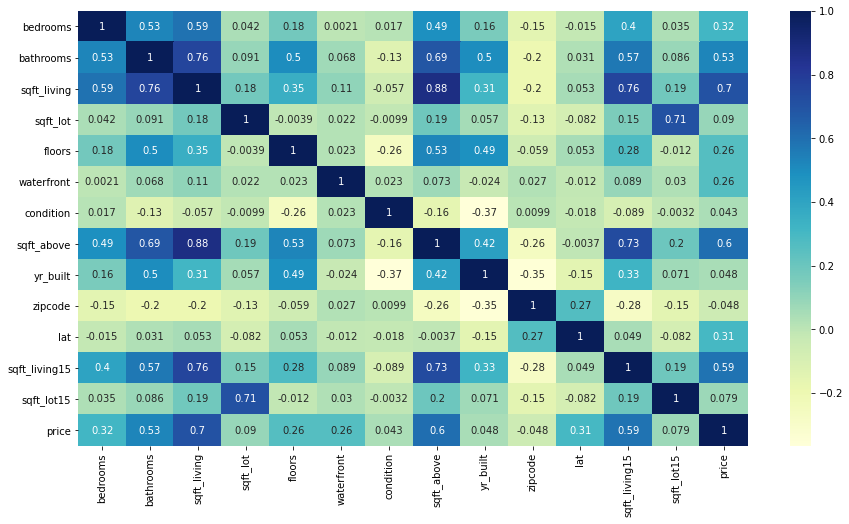

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Figure size 1080x576 with 0 Axes>

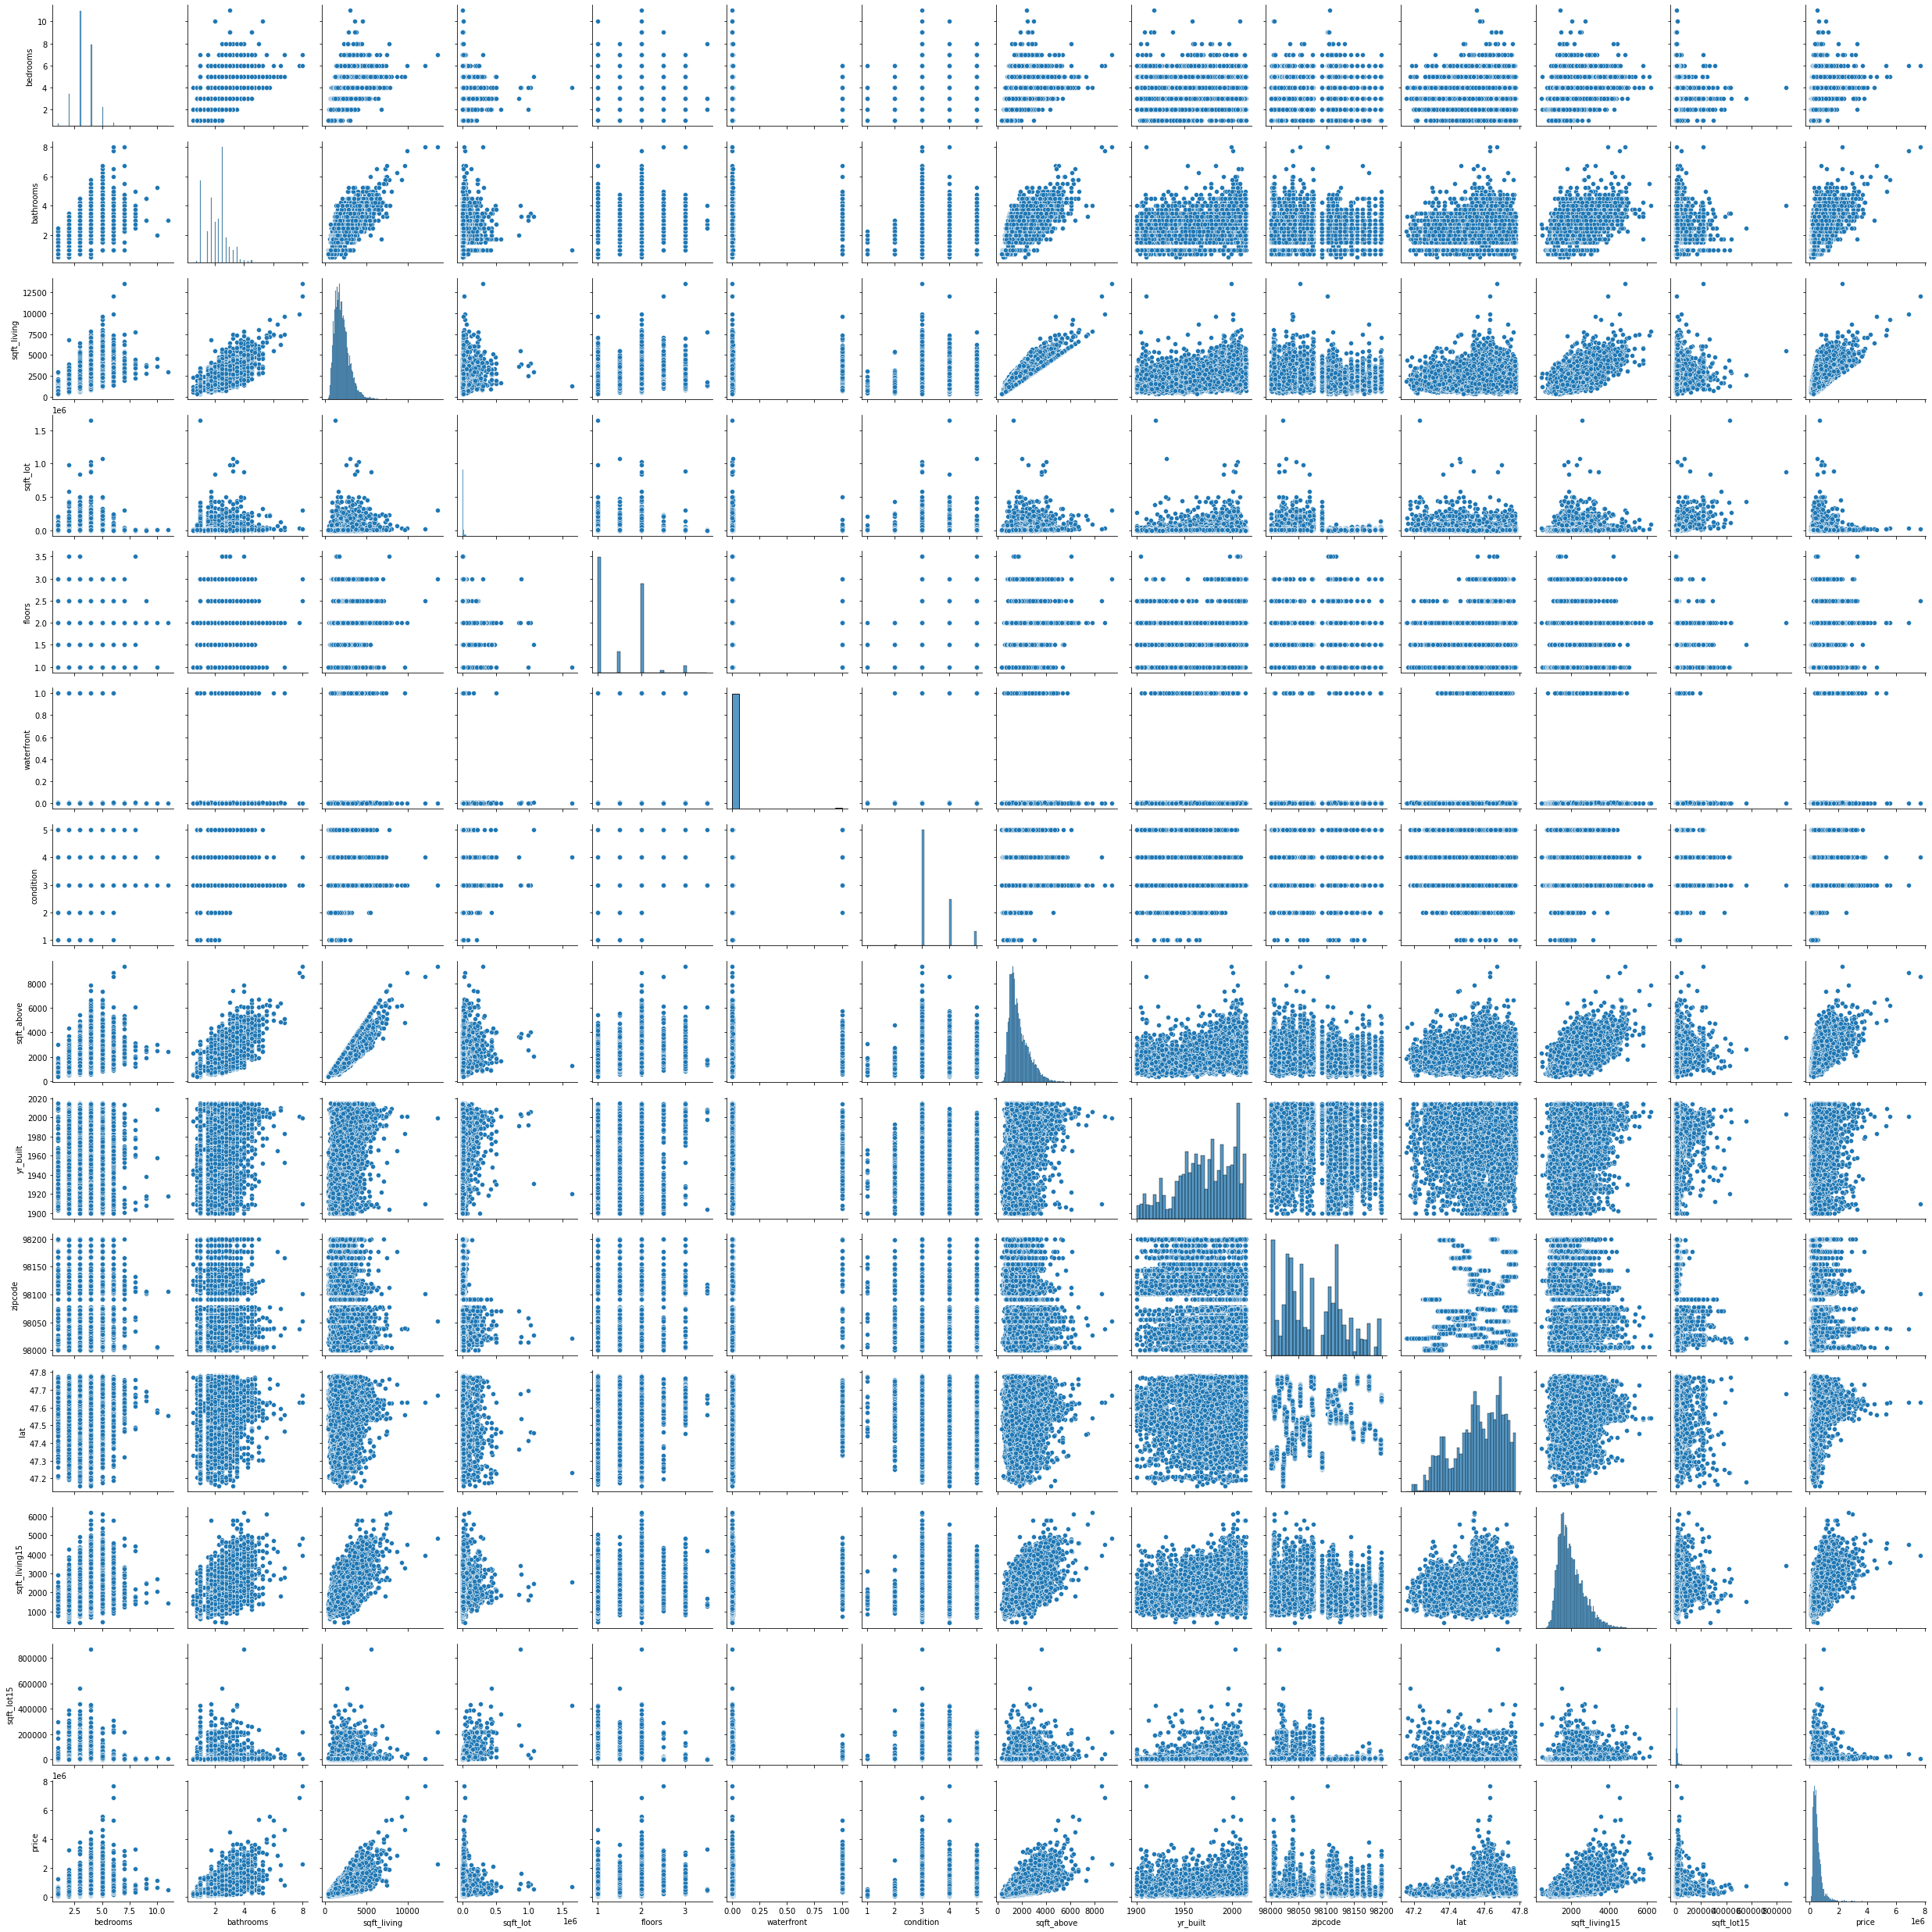

In [36]:
plt.figure(figsize=(15, 8))
sns.pairplot(data=train_data)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

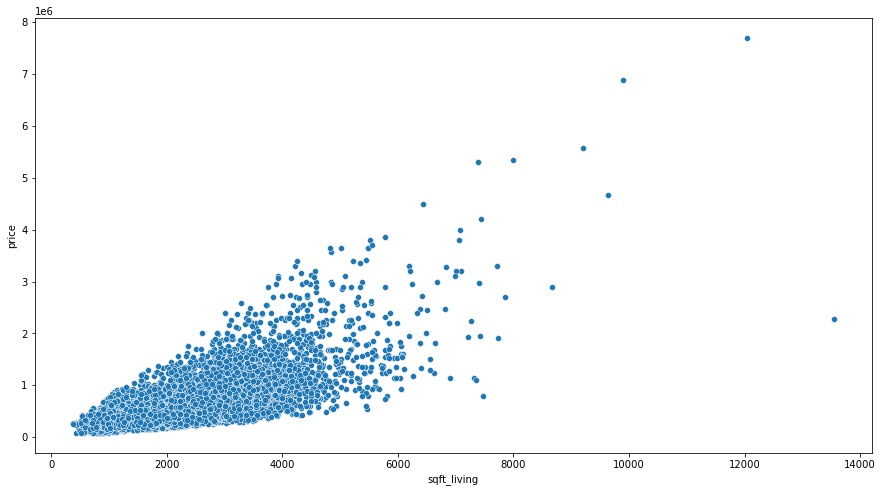

In [37]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='sqft_living', y='price', data=train_data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

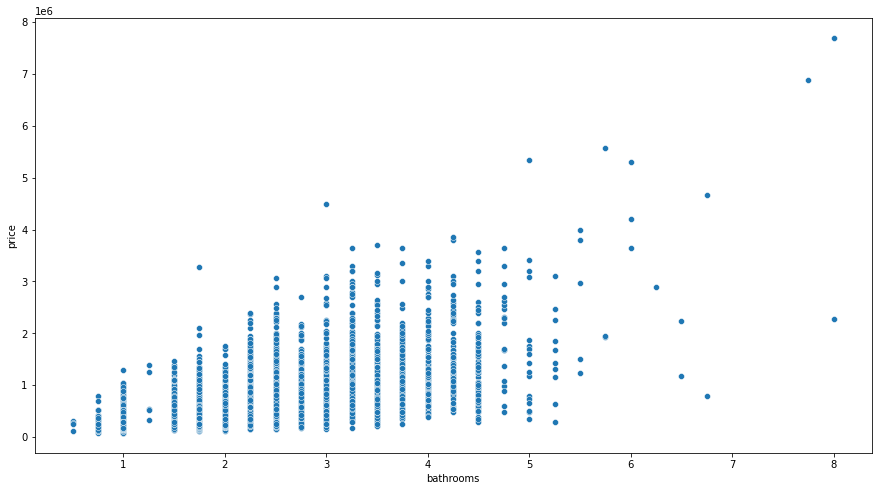

In [38]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='bathrooms', y='price', data=train_data)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

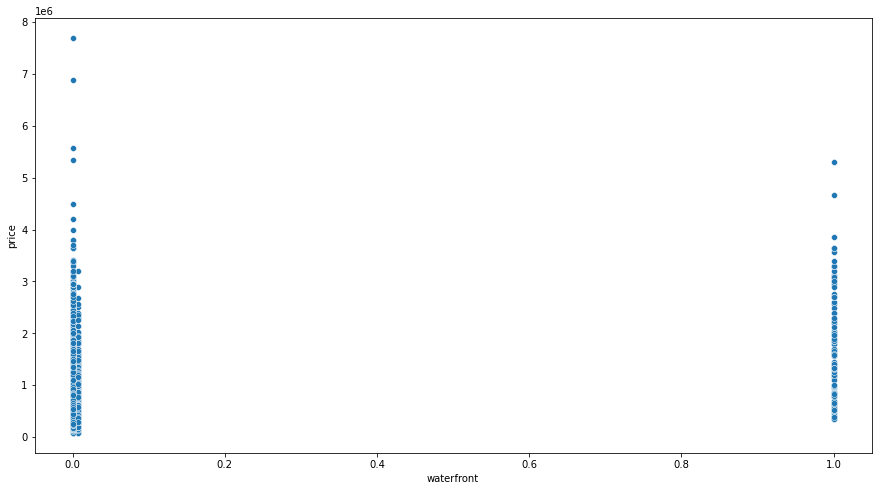

In [39]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='waterfront', y='price', data=train_data)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

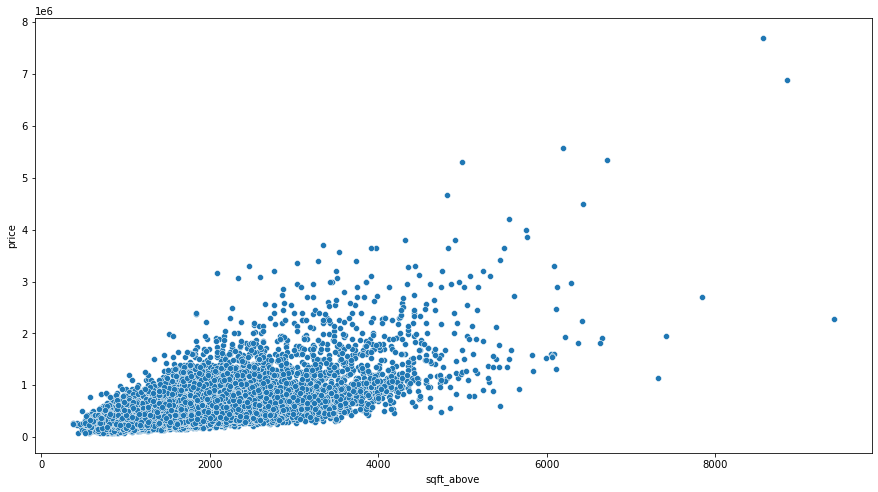

In [40]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='sqft_above', y='price', data=train_data)

<AxesSubplot:xlabel='floors', ylabel='price'>

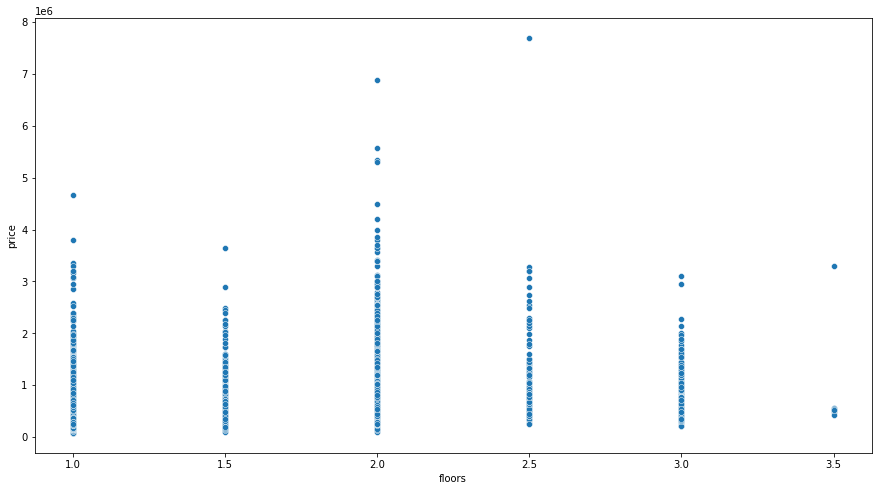

In [41]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='floors', y='price', data=train_data)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

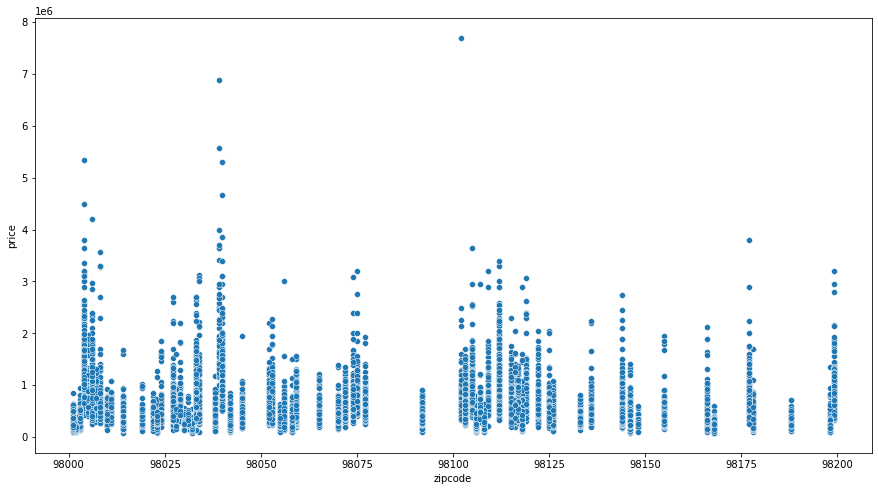

In [42]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='zipcode', y='price', data=train_data)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [45]:

lr.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(x_train)

In [47]:
print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:', 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))


R^2: 0.6515154531139894
Adjusted R^2: 0.6512530248506796


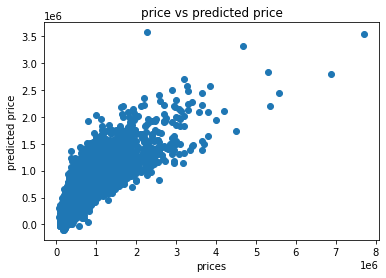

In [48]:
plt.scatter(y_train, y_pred)
plt.xlabel('prices')
plt.ylabel('predicted price')
plt.title('price vs predicted price')

plt.show()

In [49]:
lr.predict(x_test)

array([ 73545.66436438, 465660.64086519, 306331.13372553, ...,
       449809.34295233, 358506.52193359, 280505.57776918])

In [50]:
y_pred=lr.predict(x_test)
y_pred

array([ 73545.66436438, 465660.64086519, 306331.13372553, ...,
       449809.34295233, 358506.52193359, 280505.57776918])

In [51]:
acc_linreg = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1 - (1-metrics.r2_score(y_test,y_pred))*(len(y_test)-x_test.shape[1]-1))


R^2: 0.6450141851120182
Adjusted R^2: -1527.5689189076495


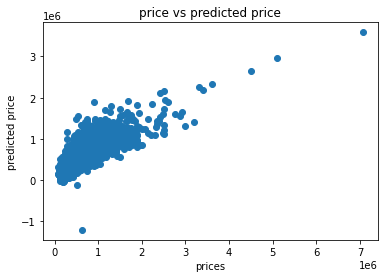

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('prices')
plt.ylabel('predicted price')
plt.title('price vs predicted price')

plt.show()

## Approach 3

In [53]:
df3 = pd.read_csv("./data/kc_house_data.csv")
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [54]:
# fill null values with df mean
df3 = df3.fillna(df3.mean())

In [55]:
#Recheck
df3.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

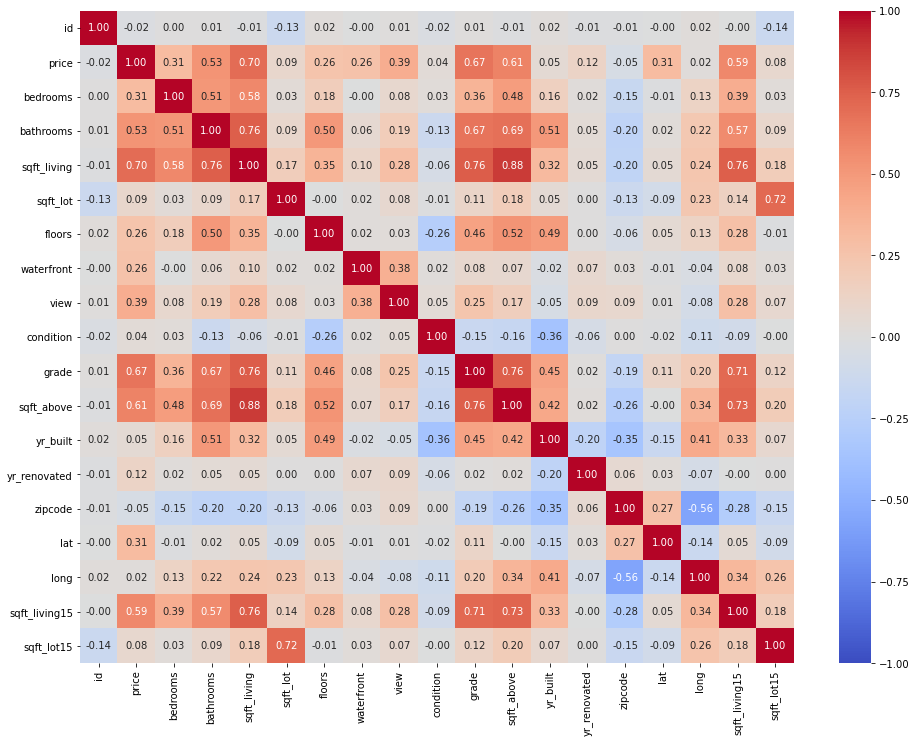

In [56]:
# Set the figure size
plt.figure(figsize=(16, 12))

# Create the heatmap
sns.heatmap(df3.corr(), cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)

# Display the plot
plt.show();

In [57]:
# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Select features with high correlation with the target variable (price)
target_corr_threshold = 0.3  # You can adjust this threshold based on your criteria
high_corr_features = correlation_matrix.index[abs(correlation_matrix["price"]) > target_corr_threshold].tolist()

# Remove the target variable itself from the list
high_corr_features.remove("price")

# Check for multicollinearity by calculating correlation among the selected features
selected_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Print the selected features and their correlation with the target variable
print("Selected features based on high correlation with price:")
for feature in high_corr_features:
    print(f"{feature}: {correlation_matrix['price'][feature]:.2f}")

# Print the correlation matrix of the selected features to check for multicollinearity
print("\nCorrelation matrix of the selected features:")
print(selected_corr_matrix)
# Further refine the selected features by removing highly correlated pairs
multicollinearity_threshold = 0.8  # You can adjust this threshold based on your criteria
final_features = high_corr_features.copy()
for feature1 in high_corr_features:
    for feature2 in high_corr_features:
        if feature1 != feature2 and abs(selected_corr_matrix.loc[feature1, feature2]) > multicollinearity_threshold:
            if feature1 in final_features:
                final_features.remove(feature1)
            if feature2 in final_features:
                final_features.remove(feature2)

print("\nFinal selected features after removing multicollinearity:")
print(final_features)

Selected features based on high correlation with price:
bedrooms: 0.31
bathrooms: 0.53
sqft_living: 0.70
view: 0.39
grade: 0.67
sqft_above: 0.61
lat: 0.31
sqft_living15: 0.59

Correlation matrix of the selected features:
               bedrooms  bathrooms  sqft_living      view     grade  \
bedrooms       1.000000   0.514508     0.578212  0.078418  0.356563   
bathrooms      0.514508   1.000000     0.755758  0.186086  0.665838   
sqft_living    0.578212   0.755758     1.000000  0.281917  0.762779   
view           0.078418   0.186086     0.281917  1.000000  0.249244   
grade          0.356563   0.665838     0.762779  0.249244  1.000000   
sqft_above     0.479386   0.686668     0.876448  0.166054  0.756073   
lat           -0.009951   0.024280     0.052155  0.006131  0.113575   
sqft_living15  0.393406   0.569884     0.756402  0.279109  0.713867   

               sqft_above       lat  sqft_living15  
bedrooms         0.479386 -0.009951       0.393406  
bathrooms        0.686668  0.0242

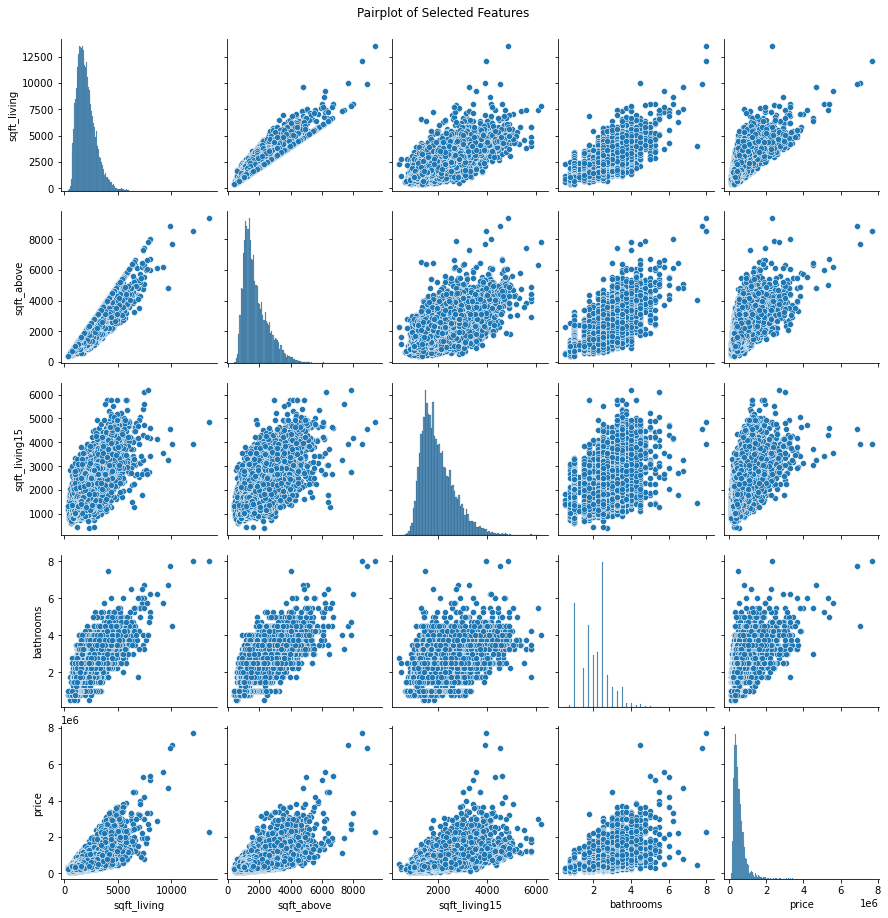

In [58]:
# Selected features 1 based on high correlation with price and removing multicollinearity
selected_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']

# Create a pairplot
sns.pairplot(df3[selected_features + ['price']], diag_kind='auto')

# Display the plot
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show();

In [61]:
# feature selection 2
df3 = df3[['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_lot15']]
df3.head()

,sqft_living,sqft_above,sqft_lot,sqft_lot15
0,1180,1180,5650,5650
1,2570,2170,7242,7639
2,770,770,10000,8062
3,1960,1050,5000,5000
4,1680,1680,8080,7503


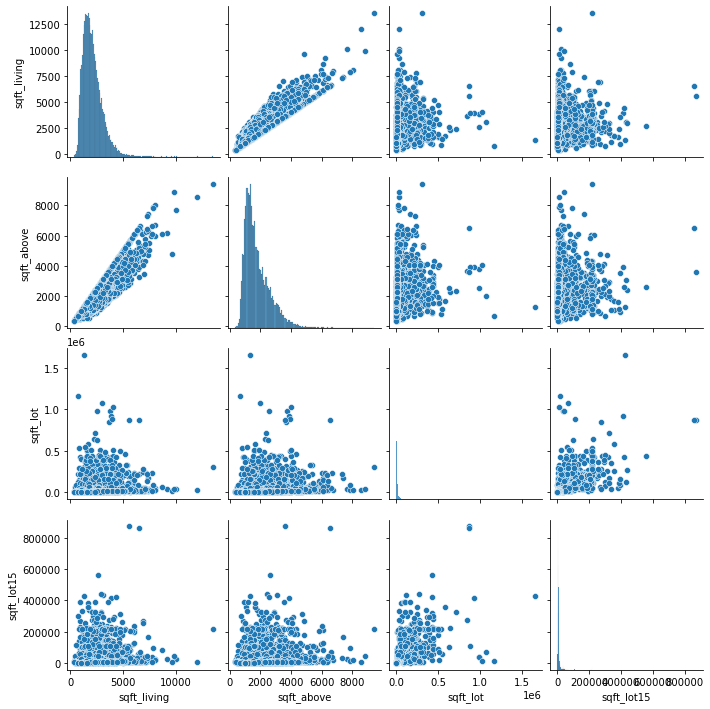

In [68]:
sns.pairplot(data=df3)

In [62]:
# Splitting data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Standardizing data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
# Initialize the model
model = LinearRegression()

# Training the model
model.fit(x_train_scaled, y_train)

LinearRegression()

In [64]:
# Predicting on the test data
y_pred = model.predict(x_test_scaled)

df = pd.DataFrame({"true":y_test, "pred":y_pred})
df.head()

,true,pred
3686,132500.0,73545.664364
10247,415000.0,465660.640865
4037,494000.0,306331.133726
3437,355000.0,232848.284714
19291,606000.0,415663.579062


In [65]:
# validation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse", mse)
print("mae", mae)
print("R2", r2)


mse 46224932307.728615
mae 137856.89542827063
R2 0.6450141851120927
